In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

%matplotlib inline

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


##### Code 6.1

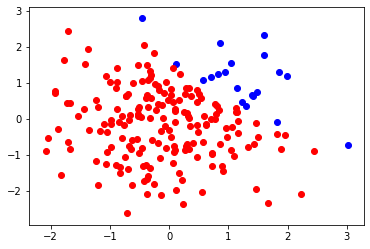

In [2]:
N = 200
p = 10

np.random.seed(1914)
nw = stats.norm.rvs(loc=0, scale=1.0, size=N)
tw = stats.norm.rvs(loc=0, scale=1.0, size=N)
s = nw + tw 
top_p = np.percentile(s, 100-p)
selected = s >= top_p

plt.scatter(nw[selected], tw[selected], color='blue')
plt.scatter(nw[~selected], tw[~selected], color='red')
plt.show()

In [3]:
np.corrcoef(tw[selected], nw[selected])

array([[ 1.        , -0.64839295],
       [-0.64839295,  1.        ]])

##### Code 6.2

In [30]:
N = 100
np.random.seed(909)

height = stats.norm.rvs(loc=10, scale=2, size=N)
leg_prop = stats.uniform.rvs(loc=0.4, scale=0.1, size=N)
leg_left = height * leg_prop + stats.norm.rvs(loc=0.0, scale=0.02)
leg_right = height * leg_prop + stats.norm.rvs(loc=0.0, scale=0.02)
data = pd.DataFrame({'left': leg_left, 'right': leg_right, 'height': height})

height = height.reshape(100, 1)
leg_left = leg_left.reshape(100, 1)
leg_right = leg_right.reshape(100, 1)

In [33]:
type(height)

numpy.ndarray

In [32]:
with pm.Model() as model_6_1:
    a = pm.Normal('a', mu=10, sd=100)
    bl = pm.Normal('bl', mu=2, sd=10)
    #br = pm.Normal('br', mu=2, sd=10)
    sigma = pm.Exponential('sigma', lam=1)
    mean = pm.Deterministic('mu', a + bl*leg_left)
    pos_height = pm.Normal('height', mu=mean, sd=sigma, observed=height)
    trace = pm.sample(20)
pm.summary(trace)

Only 20 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, a]
Sampling 4 chains: 100%|██████████| 2080/2080 [00:01<00:00, 1325.76draws/s]
/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:476: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,0.857638,0.322419,0.052198,0.093258,1.453083,27.812746,0.978886
bl,2.008392,0.069562,0.011441,1.878698,2.177853,27.127666,0.982925
sigma,0.660974,0.035492,0.004914,0.586055,0.721206,48.099718,1.054890
mu__0_0,9.081352,0.078582,0.010573,8.911460,9.205381,55.093734,0.980206
mu__1_0,10.377723,0.074610,0.010021,10.241941,10.513222,64.004417,0.991438
mu__2_0,9.342296,0.075687,0.010037,9.170353,9.462826,60.258296,0.982228
mu__3_0,7.120779,0.121472,0.018336,6.874910,7.317630,34.064486,0.975303
mu__4_0,9.049387,0.079000,0.010651,8.879747,9.173845,54.467060,0.979984
mu__5_0,8.277278,0.092620,0.013178,8.104921,8.428376,42.355636,0.976392
mu__6_0,8.748644,0.083555,0.011502,8.581367,8.877135,48.975669,0.978190


In [23]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,10.075278,0.211768,0.019535,9.594657,10.442617,145.272839,0.991309
bl,1.447389,7.902890,0.616039,-18.843077,14.366623,165.454159,0.985836
sigma,2.063789,0.159302,0.014594,1.767738,2.429597,156.439698,0.985315
mu,10.075278,0.211768,0.019535,9.594657,10.442617,145.272839,0.991309


In [8]:
with pm.Model() as model_6_1:
    a = pm.Normal('a', mu=10, sd=100)
    bl = pm.Normal('bl', mu=2, sd=10)
    #br = pm.Normal('br', mu=2, sd=10)
    sigma = pm.Exponential('sigma', lam=1)
    mu = pm.Deterministic('mu', a + bl*leg_left)
    pos_height = pm.Normal('height', mu=mu, sd=sigma, observed=height)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(tune=1000, step=step, start=start)

logp = -118.66, ||grad|| = 142.37: 100%|██████████| 31/31 [00:00<00:00, 3311.18it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1390.44draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f589887d748>,
      dtype=object)

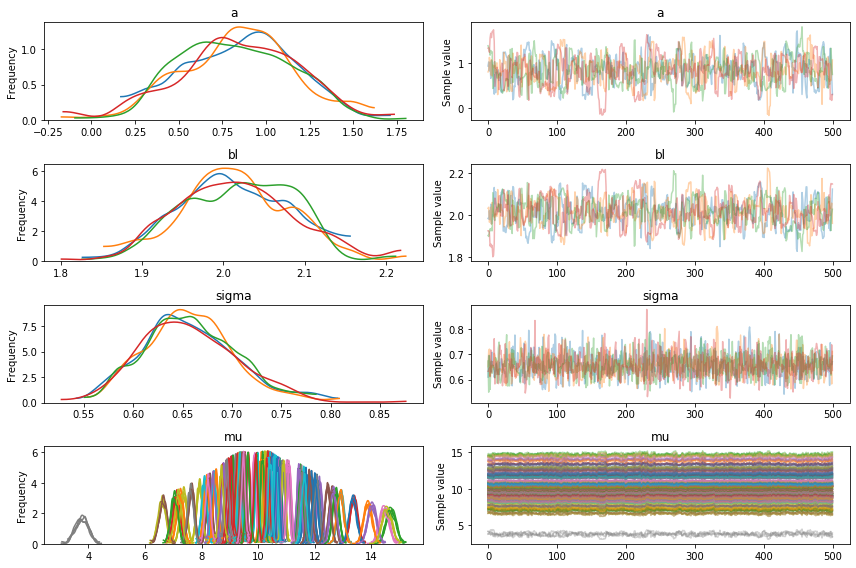

In [9]:
pm.traceplot(trace)

/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


GridSpec(1, 2, width_ratios=[3, 1])

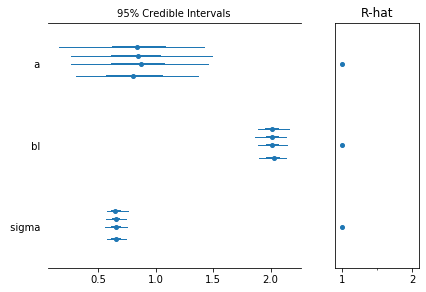

In [10]:
pm.forestplot(trace, varnames=['a', 'bl', 'sigma'])

In [12]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,0.835782,0.324012,0.013665,0.249225,1.468930,470.810304,0.999809
bl,2.015165,0.068917,0.002900,1.880884,2.138829,469.369256,0.999932
sigma,0.657259,0.047168,0.001001,0.574241,0.756588,2028.077854,0.999286
mu__0,9.087226,0.075341,0.002280,8.929185,9.231266,976.609871,0.999265
mu__1,10.387968,0.067480,0.001521,10.254764,10.519977,2021.427179,0.999415
mu__2,9.349050,0.071639,0.002014,9.184705,9.472288,1146.771386,0.999250
mu__3,7.120042,0.122037,0.004783,6.857400,7.329657,556.051128,0.999532
mu__4,9.055153,0.075855,0.002315,8.897013,9.200003,959.074951,0.999267
mu__5,8.280441,0.091441,0.003242,8.103520,8.460262,692.146943,0.999373
mu__6,8.753396,0.081257,0.002659,8.591682,8.912691,824.054136,0.999302


In [38]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

# , ax = plt.subplots(1, 2, figsize=(8, 4))
# ax[0].plot(x, y, 'C0.')
# ax[0].set_xlabel('x')
# ax[0].set_ylabel('y', rotation=0)
# ax[0].plot(x, y_real, 'k')
# az.plot_kde(y, ax=ax[1])
# ax[1].set_xlabel('y')
# plt.tight_layout()
# plt.savefig('B11197_03_02.png', dpi=300)

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_g = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:29<00:00, 811.53draws/s]


In [39]:
pm.summary(trace_g, varnames=['α', 'β', 'ϵ'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
α,2.110083,0.503274,0.007239,1.145938,3.128810,5982.804188,1.000431
β,0.941392,0.049380,0.000705,0.842202,1.036780,5981.908435,1.000449
ϵ,0.450985,0.032475,0.000279,0.390321,0.517228,9322.890055,1.000005
